In [11]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#scikit learn framework
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, roc_auc_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


**Data Dictionary**

1. `Administrative` : Number of pages visited by the visitor about account management
2. `Administrative_Duration` : the amount of time (in seconds) spent on administrative page type
3. `Informational` : Number of pages visited by the visitor about Web site, communication and address information of the shopping site
4. `Informational_Duration`: The amount of time spent (in seconds) on informational page type
5. `ProductRelated` : Number of pages visted by visitor about product related pages
6. `ProductRelated_Duration`: the amount of time spent (in seconds) of product related page
7. `BounceRates` : The percentage of visitors who enter the website through that page and exit without triggering any additional tasks
8. `ExitRates` : The percentage of pageviews on the website that end at that specific page
9. `PageValues` : the average value of the page averaged over the value of the target page and/or the completion of an eCommerce
10. `SpecialDay` : this value represents the closeness of site visiting time date to specific special days (e.g Mother's Day or valentine's Day).  
11. `OperatingSystems` : an integer value representing the operating system that the user was on when viewing the page
12. `Month`: contains the month of page view occured (in string form)
13. `Browser` : an integer value representng the browser that the user was using to view the page
14. `Region` : an integer value representing which region the user located in
15. `TrafficType` : an integer value representing what type traffic that the user is categorized into (e.g banner, SMS, direct)
16. `VisitorType` :string representing wheter a visitoer is new vistor, returning visitor, or other
17. `Weekend` : a boolean representing wheter the session is on weekend
18. `Revenue` : a boolean representing wheter or not the use completed the purchase

**Note** :
The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12 ( 2 week before the special day), zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8 ( a week before special day.

## Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
data.duplicated().sum()

125

In [5]:
data = data.drop_duplicates().reset_index(drop=True)
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


**observation**
1. No missing Value
2. 125 duplicates data
3. Data type are fine

# Exploratory Data Analysis

In [6]:
# define the numerical and categorical feature
numericals = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',]
categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType','Month', 'VisitorType', 'Weekend', 'Revenue']

In [7]:
### Descriptive Statistic
data[numericals].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


**Observation :**

1. All the columns more likely have postive skewed since the value higher than median
2. The longest max duration pages time in descending order `productrelated_duration`  page (17 hours) , `Administrative_duration` page (apprx 1 hour), `informational_duration` page (apprx 43 minutes). it is necessary to do further analysis why there are users who have such a long duration on product related pages and how their behavior is towards revenue
3. table shows that `informational`and `adminsitrative` page have the lower visitors than `ProductRelated`, probably this page has unreachable or inappropiate UI/UX design for user, need a further investigate
4. we can say there are visitors who made purchased a week before `special day`  since the maksimum value is 1. we can investigate later how is the customer purchased according to special day
5. from the `BounceRates` column we can say approx half of visitors experience bounce rate which is not a good news and we can investigate later how the bouncerates influence to `revenue`
6. from the ` PageValues` we can say that there are more than a half of customer didn't visit our page because there are 0 value for Q1,Q2, and Q3. This is a serious problem since we need to improve the customer engagement to visit the valuable page and make purchased on the website

## Univariate Analysis

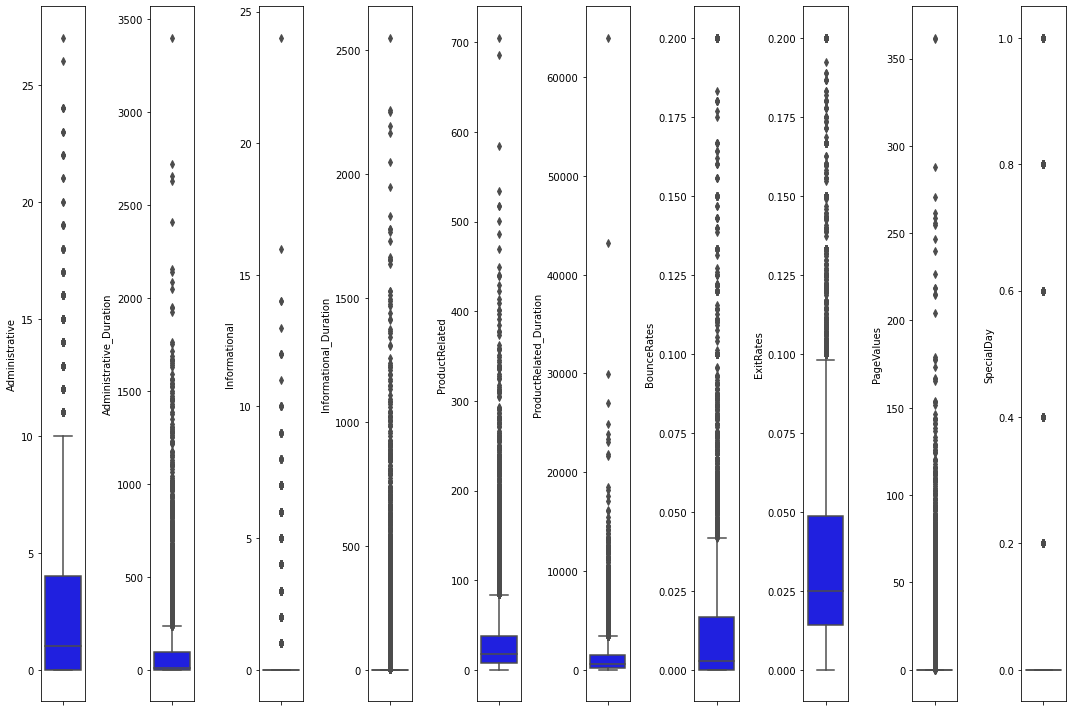

In [8]:
# adjust the figure size for better readability
plt.figure(figsize=(15,10))

# plotting
features = numericals
           
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='blue')
    plt.tight_layout()

In [8]:

def diagnostic_plots(data, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(data[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

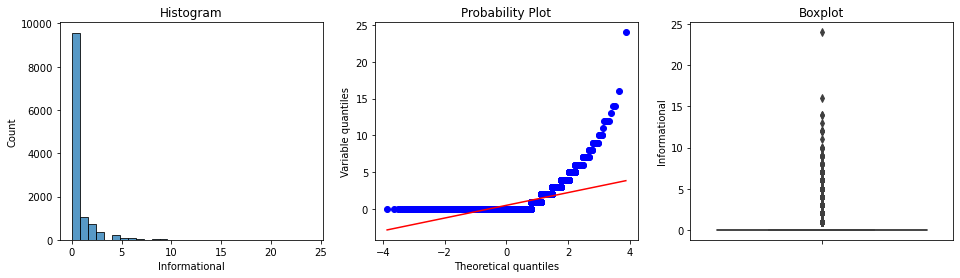

In [12]:

diagnostic_plots(data, 'Informational')

**observation :**
1. each features have so many outliers
2. we can say `adminstrative` and `informational` page are rarely visit than `product related page`
3. from `SpecialDay` we can say there are visitirs who did purchased close to the special day with diffrent interval, where the value is not zero (apprx 2 weeks before specia day) and the max value is 1 (1 weeks before sepcial day) we need to see they frequency and their behaviour towards revenue

### Outlier Visualization

In [9]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
for i in numericals:
    data_mean, data_std = mean(data[i]), std(data[i])
    
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print(i, ': \n')

    # identify outliers
    outliers = [x for x in data[i] if x < lower or x > upper]
    
    num_out = len(outliers)
    print('Identified outliers: %d' %num_out)
    outliers_removed = [x for x in data[i] if x >= lower and x <= upper]
    num_nout = len(outliers_removed)
    print('Non-outlier observations: %d' %num_nout)
    outlier_percent = (num_out / (num_out + num_nout)) * 100
    print('Percent of outliers:', outlier_percent, '\n')
    out_per.append(outlier_percent)

Administrative : 

Identified outliers: 213
Non-outlier observations: 11992
Percent of outliers: 1.7451863990167964 

Administrative_Duration : 

Identified outliers: 230
Non-outlier observations: 11975
Percent of outliers: 1.8844735764031135 

Informational : 

Identified outliers: 260
Non-outlier observations: 11945
Percent of outliers: 2.1302744776730846 

Informational_Duration : 

Identified outliers: 229
Non-outlier observations: 11976
Percent of outliers: 1.8762802130274476 

ProductRelated : 

Identified outliers: 236
Non-outlier observations: 11969
Percent of outliers: 1.9336337566571076 

ProductRelated_Duration : 

Identified outliers: 217
Non-outlier observations: 11988
Percent of outliers: 1.7779598525194593 

BounceRates : 

Identified outliers: 593
Non-outlier observations: 11612
Percent of outliers: 4.858664481769766 

ExitRates : 

Identified outliers: 599
Non-outlier observations: 11606
Percent of outliers: 4.907824662023761 

PageValues : 

Identified outliers: 257
N

In [10]:
Outliers = pd.DataFrame({'Feature': numericals, '% Of Outliers': out_per})
outlier_sorted = Outliers.sort_values('% Of Outliers', ascending = False)
outlier_sorted

,Feature,% Of Outliers
7,ExitRates,4.907825
6,BounceRates,4.858664
9,SpecialDay,3.916428
2,Informational,2.130274
8,PageValues,2.105694
4,ProductRelated,1.933634
1,Administrative_Duration,1.884474
3,Informational_Duration,1.876280
5,ProductRelated_Duration,1.777960
0,Administrative,1.745186


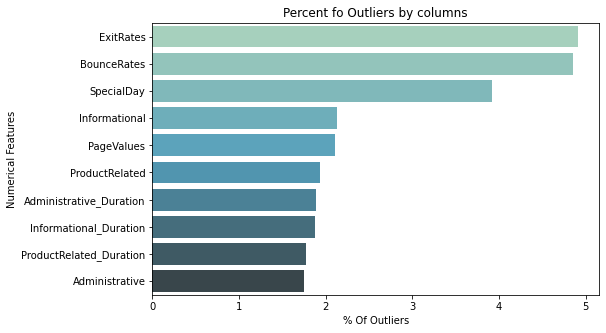

In [11]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(y = outlier_sorted['Feature'], x = outlier_sorted['% Of Outliers'], palette = 'GnBu_d')
plt.title('Percent fo Outliers by columns')
plt.ylabel('Numerical Features')
plt.show()

## Multivariate Analysis

### Categorical Features vs Revenue

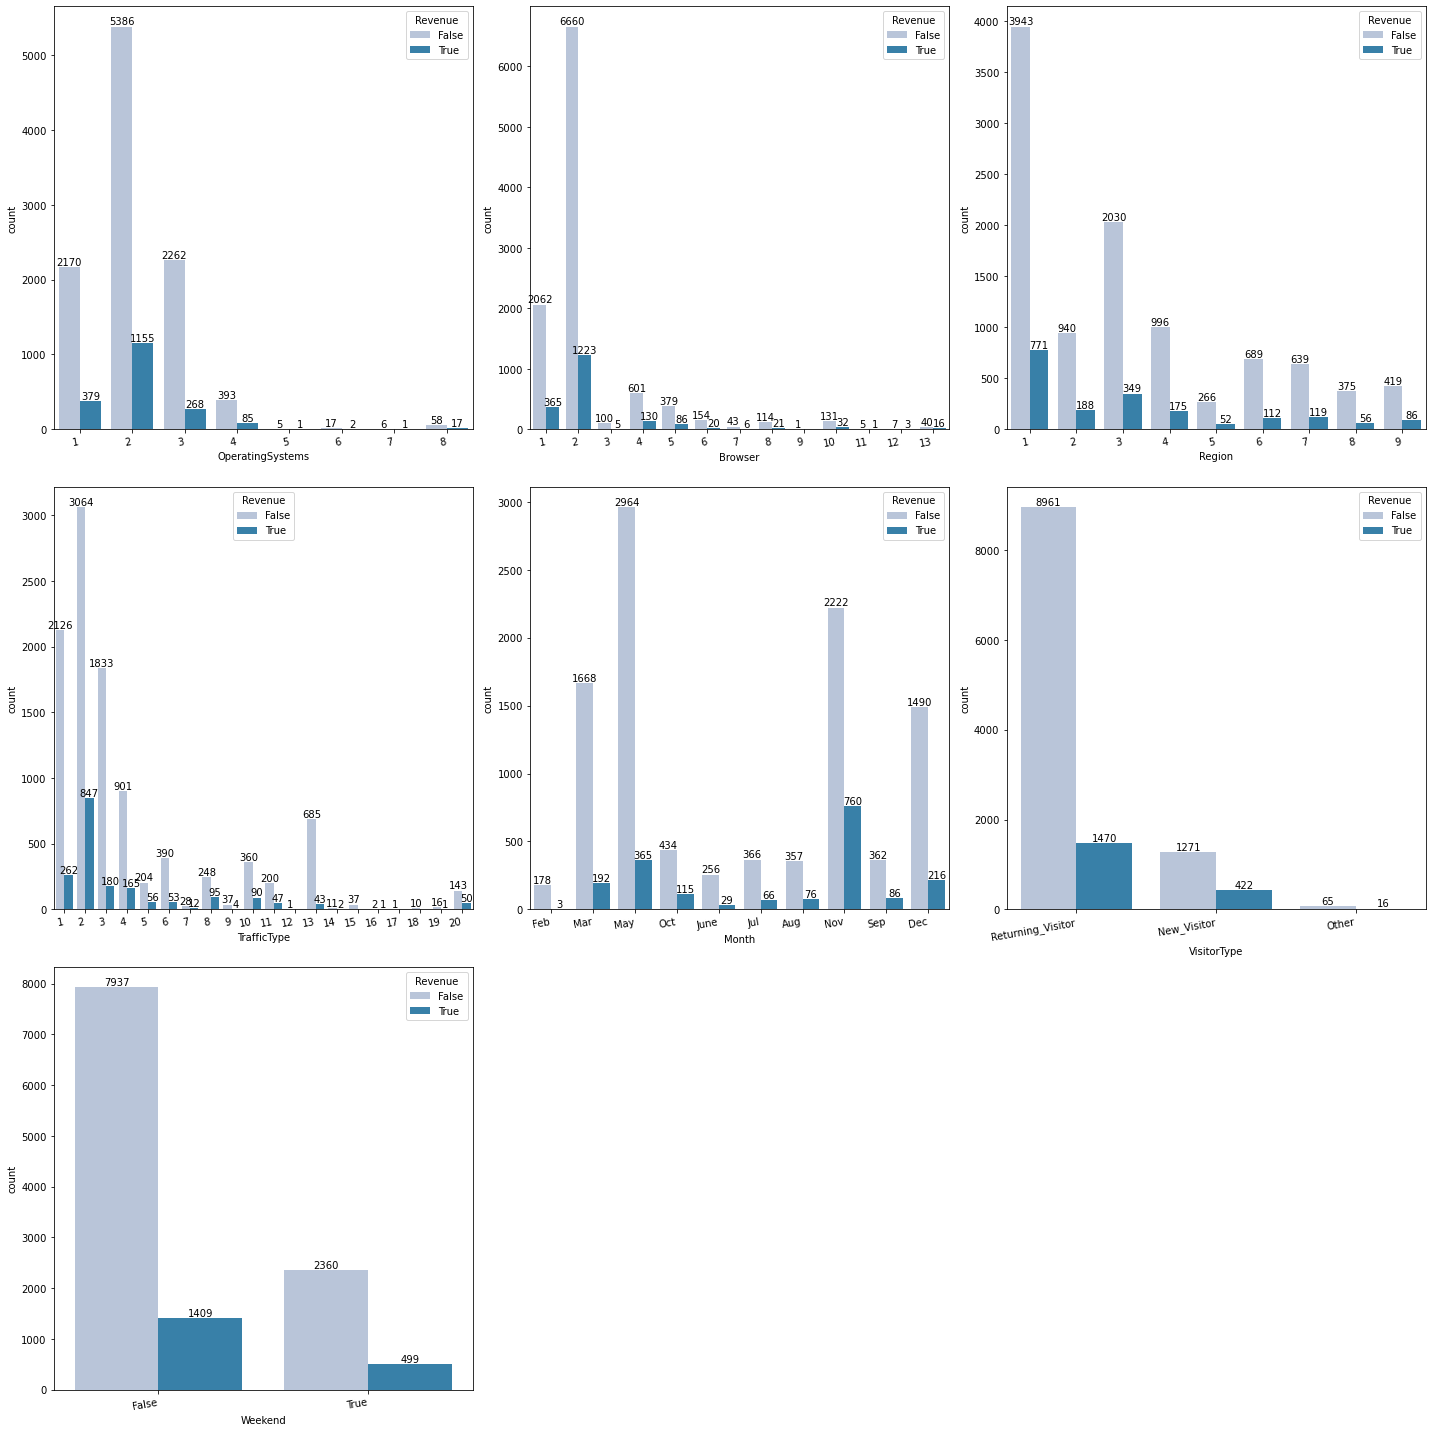

In [12]:
# Categorical Features vs Revenue
selected_categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType','Month', 'VisitorType', 'Weekend']

plt.figure(figsize=(20,20))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3+1, i)
    ax=sns.countplot(x=data[features[i-1]],hue=data['Revenue'], palette = 'PuBu')
    plt.xlabel(features[i-1])
    plt.xticks(rotation = 10, ha='right')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.tight_layout()

**Observation**
1. `operating_system` type 2 is the most popular and generate the largest quantity of purchased customers than others operating system type
2. `browser` type 2 is the most poular and generates the largest puerchased customers than others browser types
3. `traffic type` type 2 is the most popular and generates the largest revenue than other traffic type
4. `month` may has a lot of vistors but the most purchased customers generates at november, the visitors could improve by maximzing campaign for special day each month by offering special discount or special sale, 
5. not a half revisit `visitors_type` generate revenue so did the new vistors, we can improve this condition by giving reward to revisit visitor whenever they are create transaction and special offering for the new member
6. visitor generate purchased more at weekday than `weekend`
7. `Region` type 2 is the most popular and generates the most purchased customers

### Categorical Features vs Visitor Type

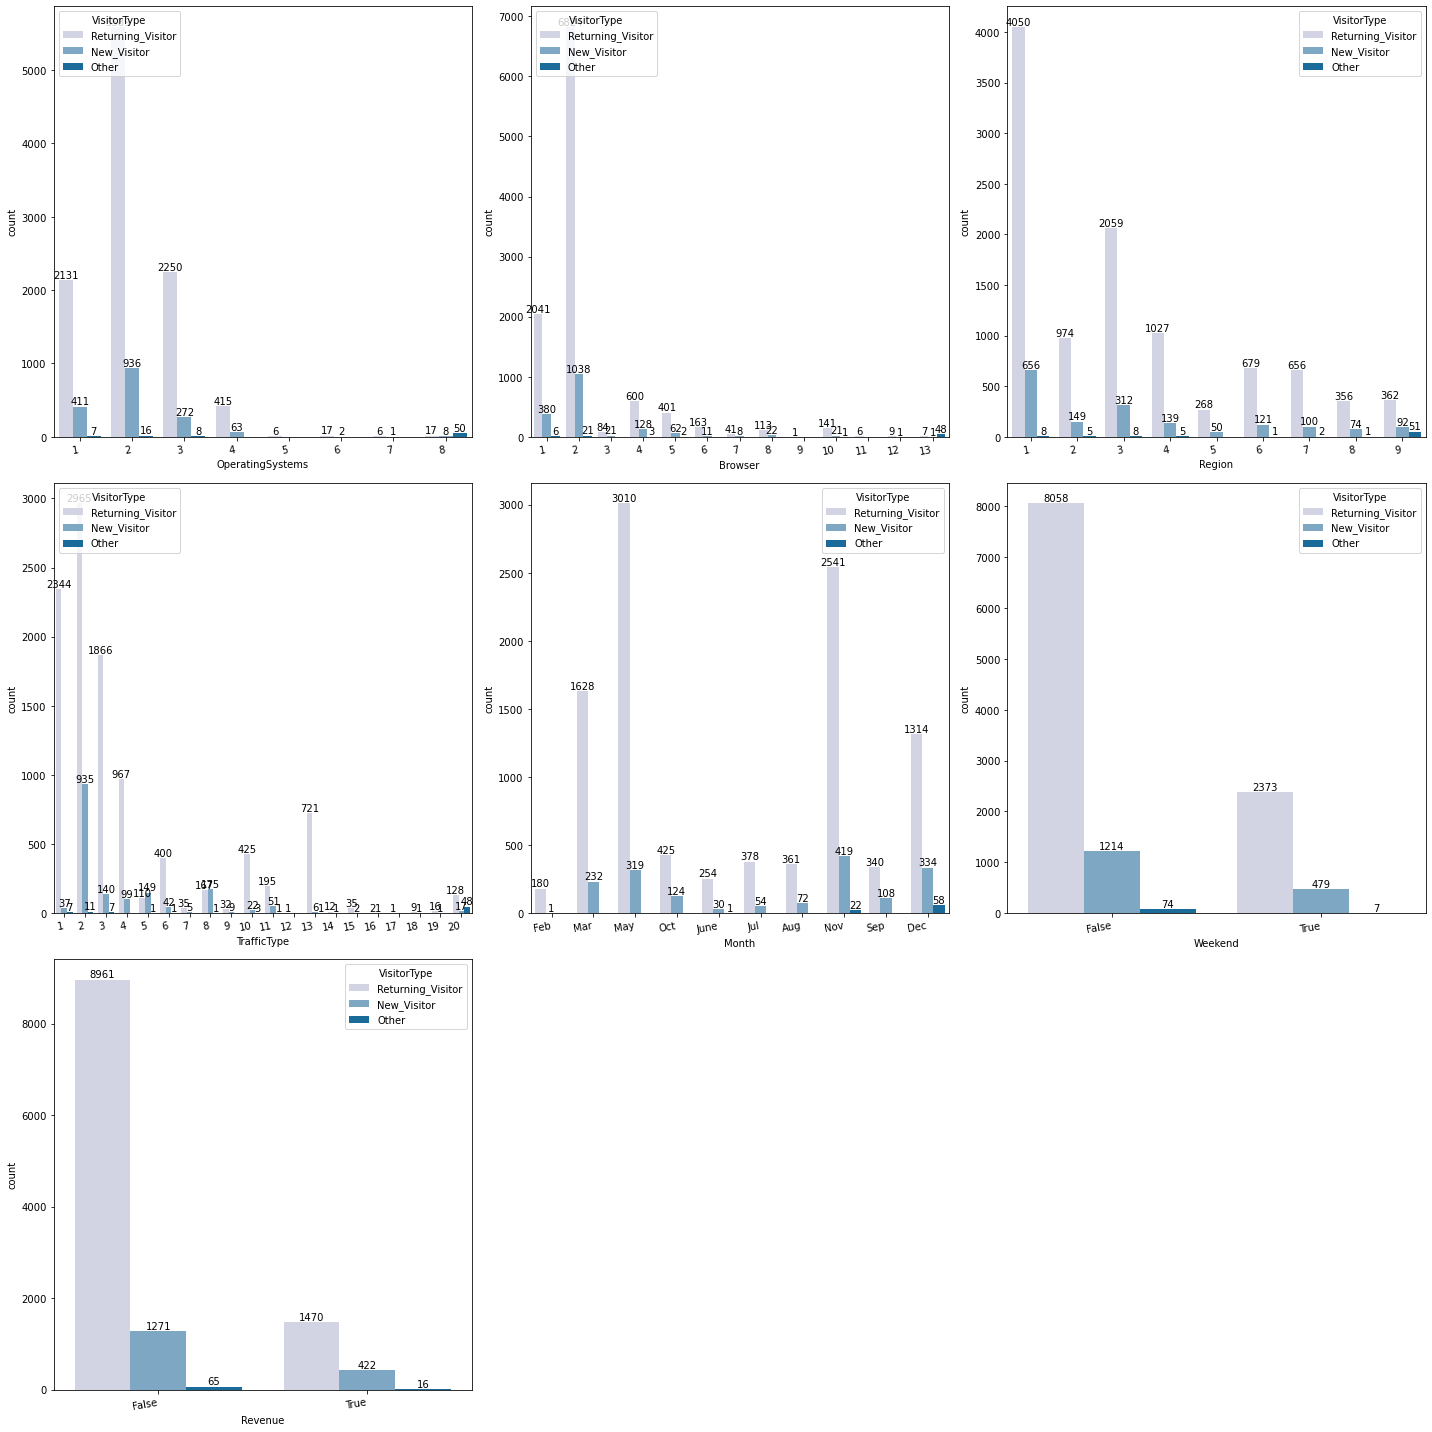

In [13]:

selected_categoricals = ['OperatingSystems', 'Browser', 'Region', 'TrafficType','Month', 'Weekend', 'Revenue']

plt.figure(figsize=(20,20))

features = selected_categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3+1, i)
    ax=sns.countplot(x=data[features[i-1]],hue=data['VisitorType'], palette = 'PuBu')
    plt.xlabel(features[i-1])
    plt.xticks(rotation = 10, ha='right')
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.bar_label(ax.containers[2])
    plt.tight_layout()

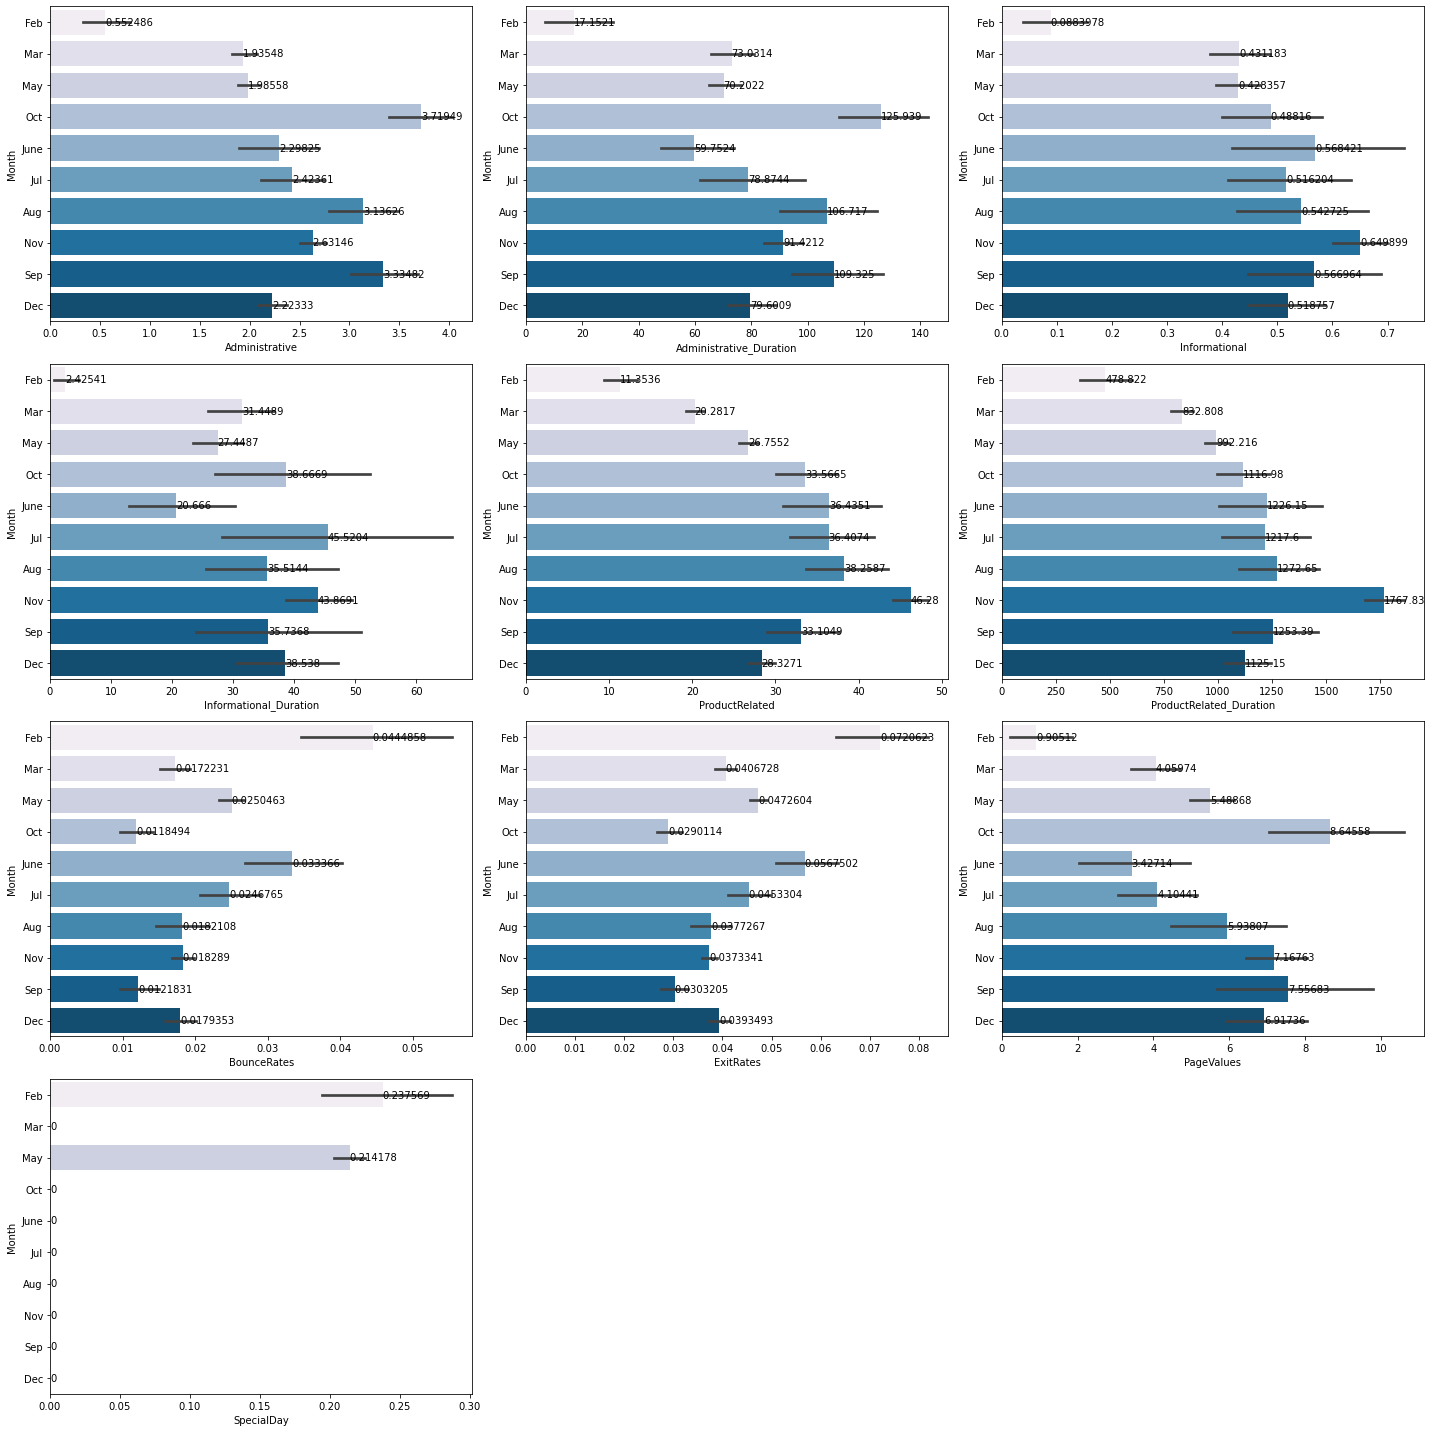

In [14]:
# Month vs Numcerical Features
plt.figure(figsize=(20,20))

features = numericals
for i in np.arange(1, len(features)+1):
    plt.subplot(4, len(features)//4+1, i)
    ax=sns.barplot(x=data[features[i-1]],y=data['Month'], palette = 'PuBu')
    plt.xlabel(features[i-1])
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

**Observation**:
1. Purchased according to special day only happen at May and February, we can imply that the special day has not been used optimally. So that efforts can be made in the form of a special day campaign to attract customers to make purchases and offer discounts on special days
2. At the beginning of February the `Bounce Rates` and `Exit Rates` were quite high compared to the following months, possibly because the website was launched because the administrative page has a lower value and duration.

### Numerical Features vs Revenue

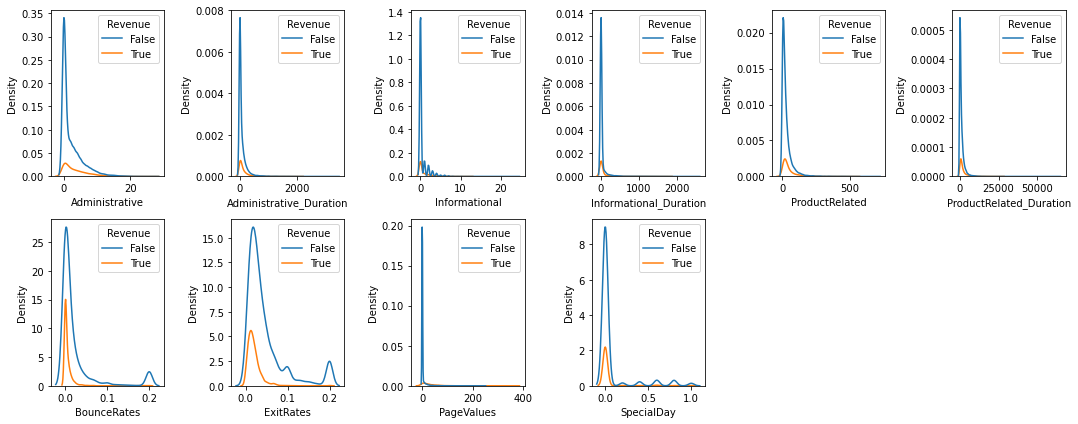

In [15]:
# Numerical Features vs Revenue
plt.figure(figsize=(15,6))

features = numericals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.kdeplot(x=data[features[i-1]], hue=data['Revenue'])
    plt.xlabel(features[i-1])
    plt.tight_layout()

**Observation**:

1. All the numeric features plot the same distribution for purchased or unpurchased visitor where all of the features are postiviely skewed which mean that most of the population distributed in low frequency/range
2. most of purchased customers have lower density that unpurchased customers
3.  Revenue vs All Pages Duration : Visitors that generates revenue morelikely spent shorter duration at each pages than visitors without reven
4. Revenue vs Visited Pages : For each pages, number of visits by visitors with revenue is lower than the visits by visitors without revenue
3. Bounce Rates vs Revenue : most of visitors with revenue experience less bounce rates
4. Exit Rates vs Revenue : most of visitors with revenue experience less exit rates
6. Special day : density of visitors who didn't make purchase at special day are higher than who did

## Multicolleniarity Study

<AxesSubplot:>

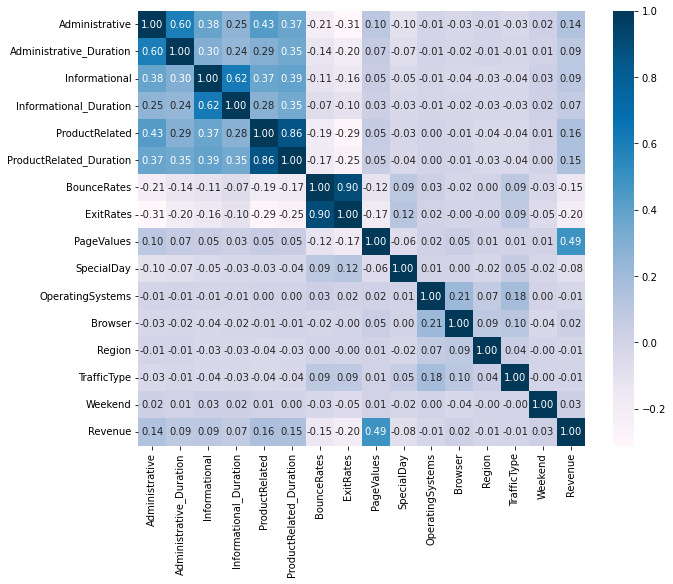

In [16]:
corr = data.corr()
plt.figure(figsize=(10,8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap = 'PuBu')

**Observation :**
1. `PageValues` have highest postive correlation to `Revenue`
2. `ExitRates`-`BounceRates` have high correlation to each other but both features have weak correlation to `revenue
3. `ProductRelated - ProductRelated_Duration` have high correlation to each other

## Monthly Conversion Rate

In [17]:
# copy dataset
tem = data.copy()

# mapping the month to intege
mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
           'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
tem['Month'] = tem['Month'].map(mapping)

# calculate the revenue and no revenue visitor
monthly = tem.groupby(['Month','Revenue']).agg(Revenue_count=('Revenue','count'))

#calculate conversion rate
monthly['Percentage'] = monthly.groupby('Month').apply(lambda x: 100* x/x.sum())
monthly = monthly.reset_index()

monthly = monthly[monthly['Revenue'] == True]
monthly


,Month,Revenue,Revenue_count,Percentage
1,2,True,3,1.657459
3,3,True,192,10.322581
5,5,True,365,10.964254
7,6,True,29,10.175439
9,7,True,66,15.277778
11,8,True,76,17.551963
13,9,True,86,19.196429
15,10,True,115,20.947177
17,11,True,760,25.486251
19,12,True,216,12.661196


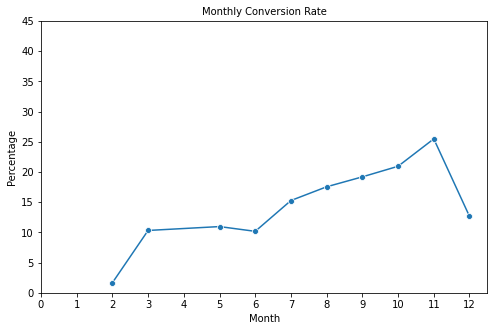

In [18]:
# plt.figure(figsize=(15, 10))
ax1 = sns.lineplot(x="Month", y="Percentage", 
            data= monthly, 
            ci=None, 
            dashes=False, 
            markers=True,
            marker = 'o'
            )

plt.title("Monthly Conversion Rate", fontsize=10)
x = np.arange(0, 13, 1)
y = np.arange (0, 50 , 5)
plt.xticks(x)
plt.yticks(y)
plt.show()

**Observation:**
- Konversi tertinggi terjadi di bulan november yaitu sebesar 25%  dimana 760 pengunjung melakukan pembelian

## Traffic Type Conversion Rate

In [19]:
# calculate the revenue and noo revenue visitor
traffic = data.copy()

traffic= traffic.groupby(['TrafficType','Revenue']).agg(Traffic_count=('Revenue','count'))

#calculate conversion rate
traffic['Conversion_Rate'] = traffic.groupby('TrafficType').apply(lambda x: 100* x/x.sum())
traffic = traffic.reset_index()

traffic = traffic[traffic['Revenue'] == True]
traffic

,TrafficType,Revenue,Traffic_count,Conversion_Rate
1,1,True,262,10.971524
3,2,True,847,21.656865
5,3,True,180,8.941878
7,4,True,165,15.478424
9,5,True,56,21.538462
11,6,True,53,11.963883
13,7,True,12,30.000000
15,8,True,95,27.696793
17,9,True,4,9.756098
19,10,True,90,20.000000


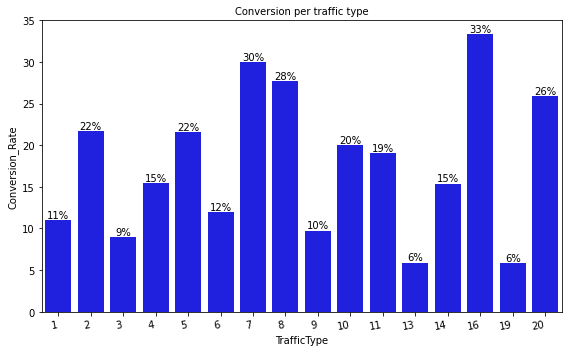

In [20]:
plt.title("Conversion per traffic type", fontsize=10)
ax= sns.barplot(
    x='TrafficType', 
    y='Conversion_Rate', 
    data= traffic, 
    color='blue')
plt.xticks(rotation = 10, ha='right')
plt.bar_label(ax.containers[0],  fmt = '%.0f%%')
plt.tight_layout()

## Traffic Type vs Visitor Type

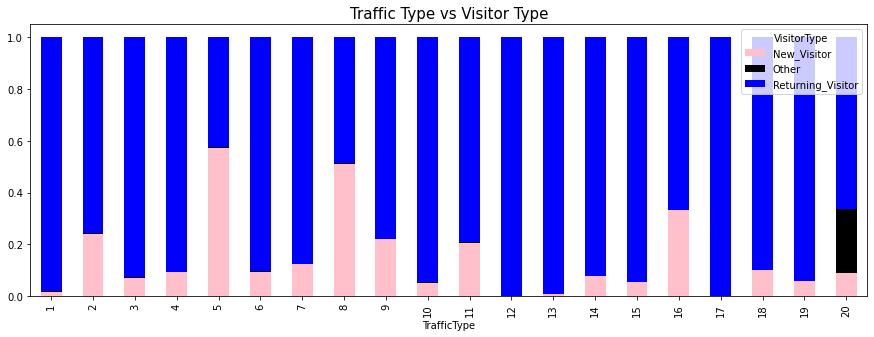

In [21]:
df = pd.crosstab(tem['TrafficType'], data['VisitorType'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'black','blue'])
plt.title('Traffic Type vs Visitor Type', fontsize = 15)
plt.show()

## Browser Conversion Rate

In [22]:
# copy dataset
bro = data.copy()

bro= bro.groupby(['Browser','Revenue']).agg(Browser_count=('Revenue','count'))

#calculate conversion rate
bro['Conversion_Rate'] = bro.groupby('Browser').apply(lambda x: 100* x/x.sum())
bro = bro.reset_index()

bro = bro[bro['Revenue'] == True]
bro

,Browser,Revenue,Browser_count,Conversion_Rate
1,1,True,365,15.039143
3,2,True,1223,15.514398
5,3,True,5,4.761905
7,4,True,130,17.783858
9,5,True,86,18.494624
11,6,True,20,11.494253
13,7,True,6,12.244898
15,8,True,21,15.555556
18,10,True,32,19.631902
20,11,True,1,16.666667


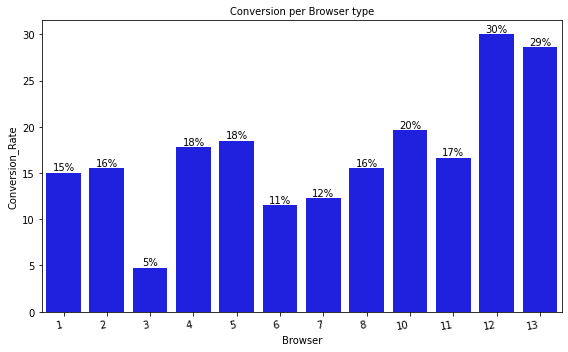

In [23]:
plt.title('Conversion per Browser type', fontsize=10)
ax= sns.barplot(
    x='Browser', 
    y='Conversion_Rate', 
    data= bro, 
    color='blue')
plt.xticks(rotation = 10, ha='right')
plt.bar_label(ax.containers[0],  fmt = '%.0f%%')
plt.tight_layout()

## Browser Type vs Visitor Type

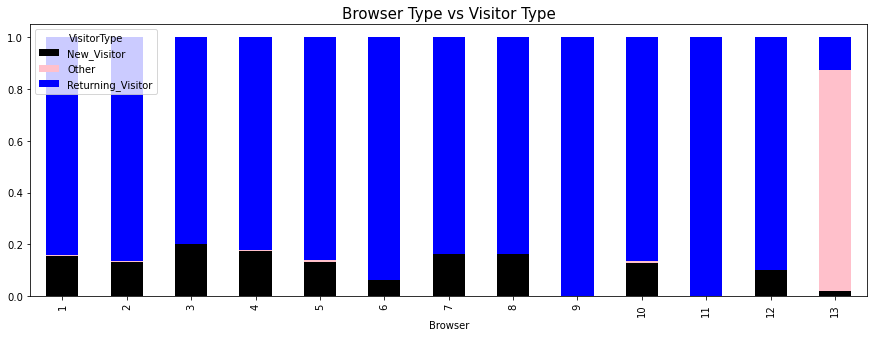

In [24]:
df = pd.crosstab(tem['Browser'], data['VisitorType'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['black', 'pink','blue'])
plt.title('Browser Type vs Visitor Type', fontsize = 15)
plt.show()

## Conversion per Region

In [25]:
# copy data
reg = data.copy()

reg= reg.groupby(['Region','Revenue']).agg(Region_count=('Revenue','count'))

#calculate conversion rate
reg['Conversion_Rate'] = reg.groupby('Region').apply(lambda x: 100* x/x.sum())
reg = reg.reset_index()

reg = reg[reg['Revenue'] == True]
reg

,Region,Revenue,Region_count,Conversion_Rate
1,1,True,771,16.355537
3,2,True,188,16.666667
5,3,True,349,14.670029
7,4,True,175,14.944492
9,5,True,52,16.352201
11,6,True,112,13.982522
13,7,True,119,15.699208
15,8,True,56,12.993039
17,9,True,86,17.029703


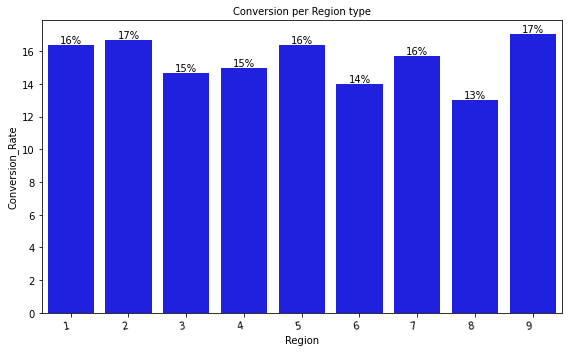

In [26]:
plt.title("Conversion per Region type", fontsize=10)
ax= sns.barplot(
    x='Region', 
    y='Conversion_Rate', 
    data= reg, 
    color='blue')
plt.xticks(rotation = 10, ha='right')
plt.bar_label(ax.containers[0],  fmt = '%.0f%%')
plt.tight_layout()

## Region vs Visitor Type

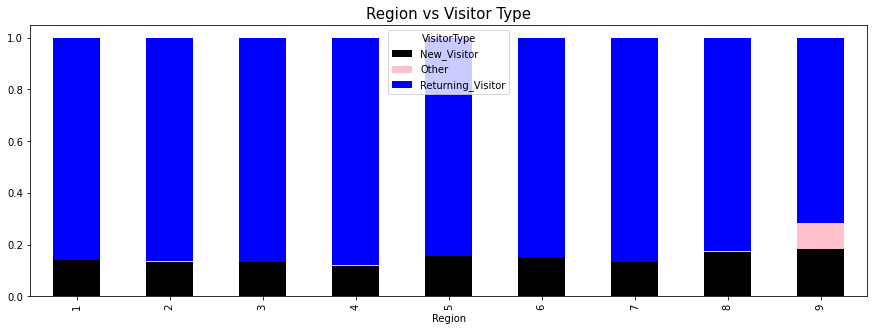

In [27]:
df = pd.crosstab(tem['Region'], data['VisitorType'])
df.div(df.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['black', 'pink','blue'])
plt.title('Region vs Visitor Type', fontsize = 15)
plt.show()

## Page value vs Bounce Rate vs Exit Rate

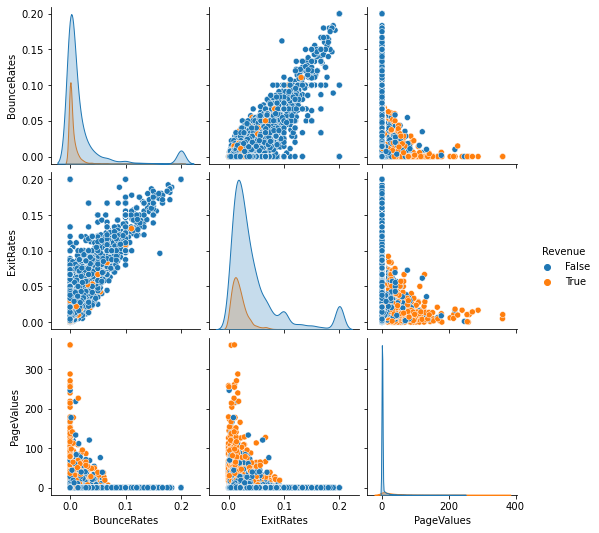

In [28]:
# importing packages
import seaborn
import matplotlib.pyplot as plt
 
############# Main Section ############
# loading dataset using seaborn
df = data[['Revenue', 'BounceRates','ExitRates','PageValues']]
# pairplot with hue sex
seaborn.pairplot(df, hue ='Revenue')
# to show
plt.show()

## Visitor type vs BounceRates according to Revenue

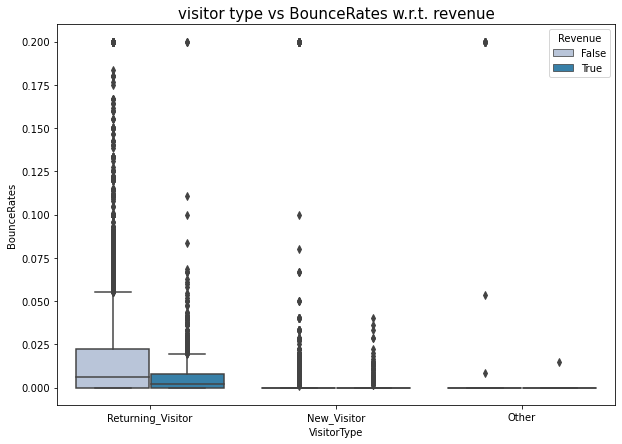

In [29]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['BounceRates'], hue = data['Revenue'], palette = 'PuBu')
plt.title('visitor type vs BounceRates w.r.t. revenue', fontsize = 15)
plt.show()

**Observation** : 
- returning visitors morelikely experience one page session this is should be a concern for the company because need to boost they call to action starategy for the returning visitors to finish they purchased 

## Vistor type vs Exit Rates according to Revenue

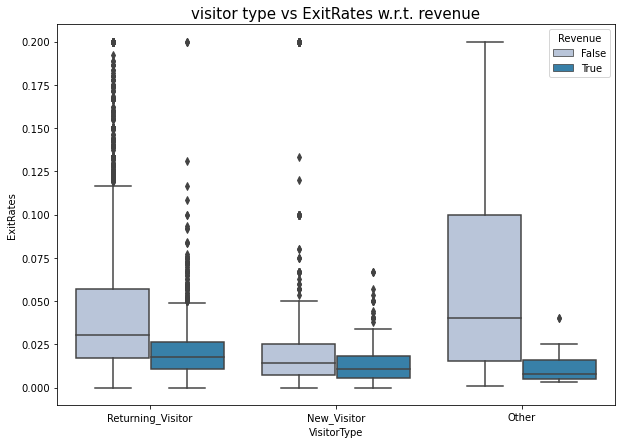

In [30]:
# boxplot for visitorType vs BounceRates w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['ExitRates'], hue = data['Revenue'], palette = 'PuBu')
plt.title('visitor type vs ExitRates w.r.t. revenue', fontsize = 15)
plt.show()

**Observation**
1. Returning and new vistors distribution have lots of outlier
2. returning visitors experience more exit rates than new visitors

## visitorType vs Page Value w.r.t. revenue

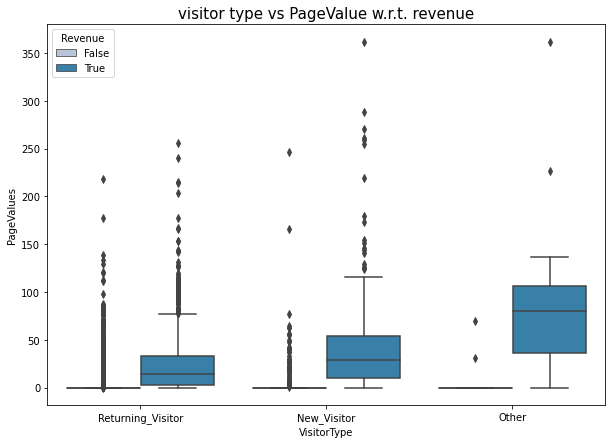

In [31]:
# boxplot for visitorType vs Page Value w.r.t. revenue
plt.rcParams['figure.figsize'] = (10, 7)

sns.boxplot(x = data['VisitorType'], y = data['PageValues'], hue = data['Revenue'], palette = 'PuBu')
plt.title('visitor type vs PageValue w.r.t. revenue', fontsize = 15)
plt.show()

## Bounce Rate, Exit Rate,  and Page Value w.r.t Revenue

In [32]:
# function to check outlier
def check_outlier(data,column):
    q1 = r[column].quantile(0.25)
    q3 = r[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr)
                                else 'not out-lier' for x in data[column].values]

### Bounce Rate

In [33]:
# copy the data
r = data.copy()

# BounceRates Outlier
r['outlier_br'] = check_outlier(data=r, column='BounceRates')

# Excluding outlier of Bounce Rates
r1 = r.loc[r['outlier_br'] == 'not out-lier']
r1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,outlier_br
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,not out-lier
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,not out-lier
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,not out-lier
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False,not out-lier
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False,not out-lier


In [34]:
# Bounce Rates Median Value
r1.groupby('Revenue').agg({'BounceRates':['median']})

,BounceRates
,median
Revenue,
False,0.0
True,0.0


<AxesSubplot:xlabel='BounceRates', ylabel='Count'>

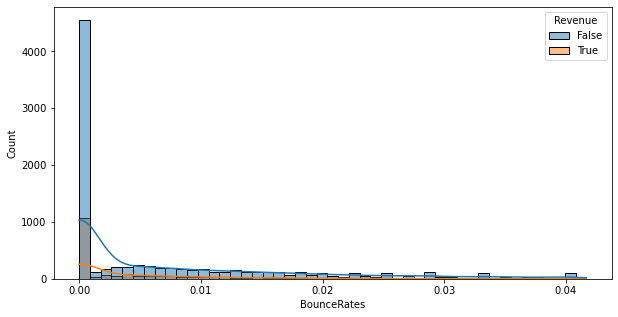

In [35]:
# Bounce Rates final distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r1
            ,x = 'BounceRates'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )


`BounceRates treshold` :
- 0  encode as 1
- greather than 0 encode as  0

### Exit Rate

In [36]:
# Exit Rates Outlier
r['outlier_er'] = check_outlier(data=r, column='ExitRates')


# Excluding Outlier of Exit Rates
r2 = r.loc[r['outlier_er'] == 'not out-lier']
r2.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,outlier_br,outlier_er
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,not out-lier,not out-lier
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False,not out-lier,not out-lier
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False,not out-lier,not out-lier
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.0,0.0,Feb,1,1,3,3,Returning_Visitor,False,False,not out-lier,not out-lier
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.0,0.4,Feb,1,1,4,3,Returning_Visitor,False,False,not out-lier,not out-lier


In [37]:
# Exit Rates Median Value
r2.groupby('Revenue').agg({'ExitRates':['median']})

,ExitRates
,median
Revenue,
False,0.024749
True,0.015909


<AxesSubplot:xlabel='ExitRates', ylabel='Count'>

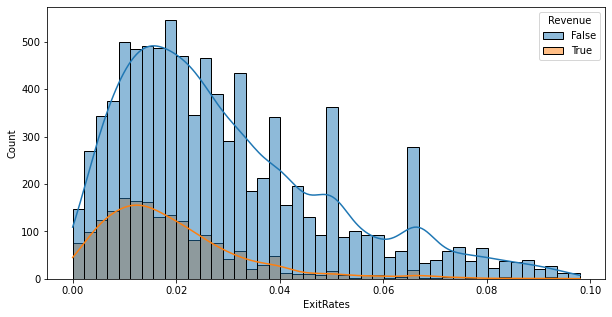

In [38]:
# Final distribution of Exit Rates
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r2
            ,x = 'ExitRates'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

ExitRates treshold:

- <= 0.015909 : enode as 1
- greather than  0.015909 : encode as 0

### Page Value

<AxesSubplot:xlabel='PageValues', ylabel='Count'>

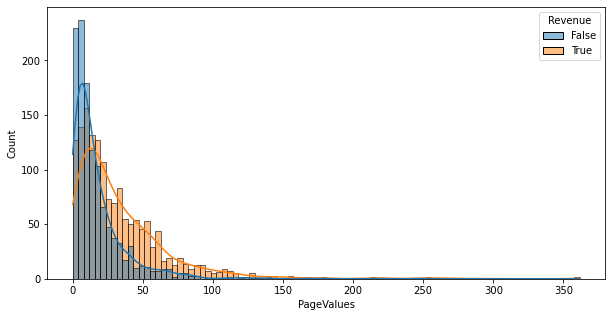

In [39]:
# Page Value
r['outlier_pagevalue'] = check_outlier(data=r, column='PageValues')

# filter outlier
r11 = r.loc[r['outlier_pagevalue'] == 'outlier']

# product related distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r11
            ,x = 'PageValues'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [40]:
# page value Median Value
r11.groupby('Revenue').agg({'PageValues':['median']})

,PageValues
,median
Revenue,
False,10.457073
True,22.966140


<AxesSubplot:xlabel='Revenue', ylabel='PageValues'>

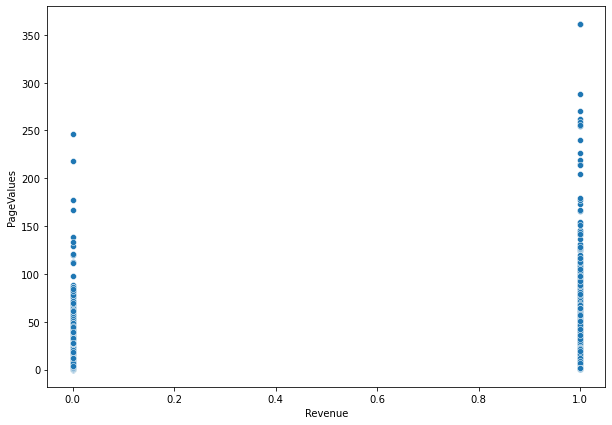

In [41]:
sns.scatterplot(data=r11, y="PageValues", x="Revenue")

## Administrative page visitation amount and duration

<AxesSubplot:xlabel='Administrative', ylabel='Count'>

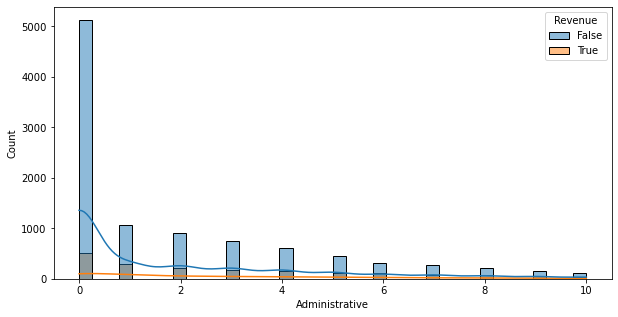

In [42]:
# Administrattive page  amount outlier handling
r['outlier_adm'] = check_outlier(data=r, column='Administrative')

# filter outlier
r5 = r.loc[r['outlier_adm'] == 'not out-lier']

# admnisitative page amount final distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r5
            ,x = 'Administrative'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [43]:
# Administrative page amount Median Value
r5.groupby('Revenue').agg({'Administrative':['median']})

,Administrative
,median
Revenue,
False,0.0
True,2.0


<AxesSubplot:xlabel='Administrative_Duration', ylabel='Count'>

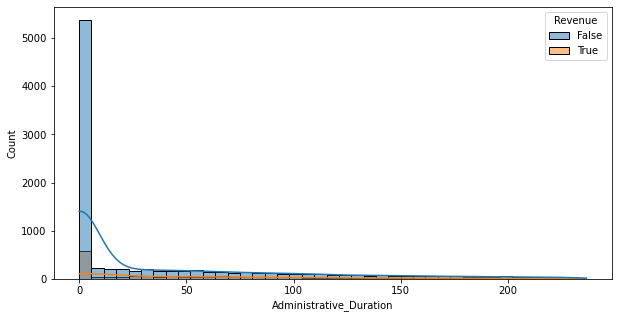

In [44]:
# Administrattive Duration
r['outlier_adm_dur'] = check_outlier(data=r, column='Administrative_Duration')

# filter outlier
r6 = r.loc[r['outlier_adm_dur'] == 'not out-lier']

# admnisitative duration final distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r6
            ,x = 'Administrative_Duration'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [45]:
# Administrative duration Median Value
r6.groupby('Revenue').agg({'Administrative_Duration':['median']})

,Administrative_Duration
,median
Revenue,
False,0.0
True,34.1


## Product Related Page Amount and Duration

<AxesSubplot:xlabel='ProductRelated', ylabel='Count'>

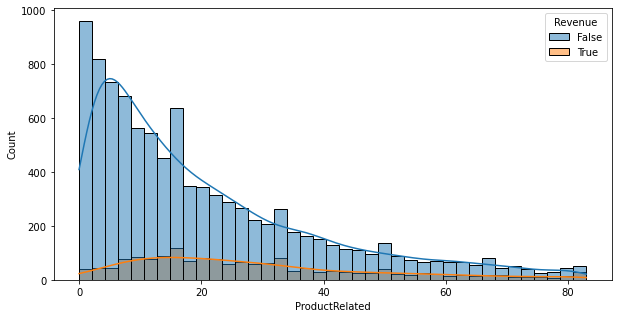

In [46]:
# ProductRelated page outlier handling
r['outlier_prod'] = check_outlier(data=r, column='ProductRelated')

# filter outlier
r8 = r.loc[r['outlier_prod'] == 'not out-lier']

# product related distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r8
            ,x = 'ProductRelated'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [47]:
# product related page Median Value
r8.groupby('Revenue').agg({'ProductRelated':['median']})

,ProductRelated
,median
Revenue,
False,15.0
True,24.0


<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='Count'>

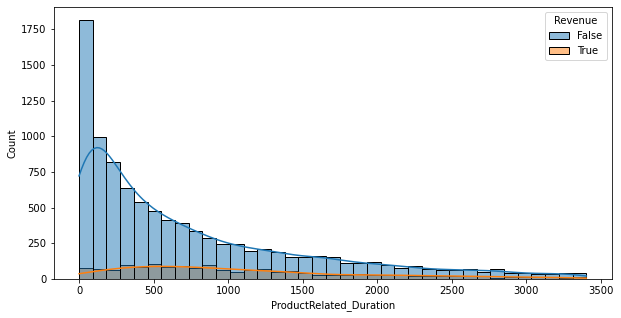

In [48]:
# ProductRelated duration
r['outlier_prod_dur'] = check_outlier(data=r, column='ProductRelated_Duration')

# filter outlier
r9 = r.loc[r['outlier_prod_dur'] == 'not out-lier']

# product related duration distribution
f, ax = plt.subplots(1,1,figsize=(10,5))
sns.histplot(data = r9
            ,x = 'ProductRelated_Duration'
            ,color = 'navy'
            ,kde = True
            , hue ='Revenue'
            )

In [49]:
# product related page Median Value
r9.groupby('Revenue').agg({'ProductRelated_Duration':['median']})

,ProductRelated_Duration
,median
Revenue,
False,460.75
True,893.45


## Informational Page Amount and Duration

<AxesSubplot:xlabel='Revenue', ylabel='Informational'>

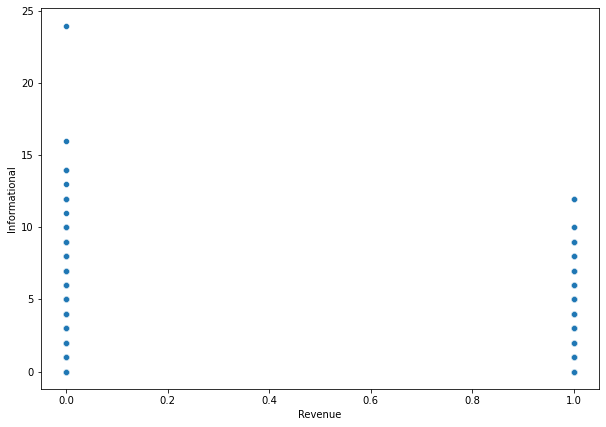

In [22]:
# visualize informationa page amount according to revenue
sns.scatterplot(data=data, y="Informational", x="Revenue")

In [26]:
# calculate median value for informational page amount
data.groupby('Revenue').agg({'Informational':['median']})

,Informational
,median
Revenue,
False,0.0
True,0.0


<AxesSubplot:xlabel='Revenue', ylabel='Informational_Duration'>

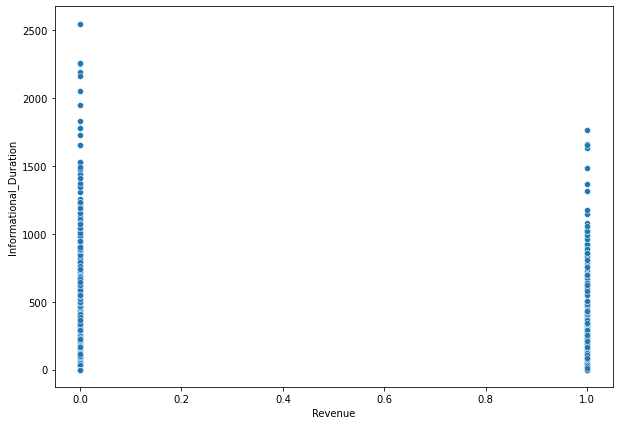

In [23]:
# Visualize informational duraton according to revenue
sns.scatterplot(data=data, y="Informational_Duration", x="Revenue")

In [25]:
# calculate informational page duration median value
data.groupby('Revenue').agg({'Informational_Duration':['median']})

,Informational_Duration
,median
Revenue,
False,0.0
True,0.0
